# [CNN으로 컬러 이미지 분류]

In [1]:
# package 수입
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras.utils.np_utils import to_categorical
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dropout, InputLayer,Dense

In [2]:
# 하이퍼 파라미터
MY_DROP = 0.1       # dropout에 사용
MY_EPOCH = 20       # 반복 학습 수
MY_BATCH = 500      # 매번 가져와서 계산하는 학습용 데이터

[[[153 157 155]
  [174 180 188]
  [155 165 172]
  ...
  [122 125 123]
  [138 143 141]
  [ 97 101  97]]

 [[160 163 165]
  [164 170 180]
  [150 159 169]
  ...
  [137 135 129]
  [160 161 157]
  [103 109 107]]

 [[140 143 147]
  [147 152 166]
  [136 145 158]
  ...
  [104 103  99]
  [125 128 125]
  [ 93 102 101]]

 ...

 [[175 177 179]
  [170 172 174]
  [170 172 174]
  ...
  [193 203 212]
  [197 206 214]
  [199 204 213]]

 [[174 177 181]
  [173 176 180]
  [171 174 178]
  ...
  [200 208 216]
  [202 209 218]
  [208 212 221]]

 [[168 173 180]
  [164 169 175]
  [166 171 177]
  ...
  [204 209 217]
  [204 208 217]
  [206 210 219]]]
라벨 : [4]
X_train 모양	: (50000, 32, 32, 3)
X_test 모양	: (10000, 32, 32, 3)
Y_train 모양	: (50000, 1)
Y_test 모양	: (10000, 1)


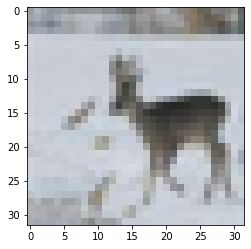

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# 데이터 샘플
print(X_train[20])
plt.imshow(X_train[20])
print('라벨 :',Y_train[20])

# 데이터 모양
print("X_train 모양\t:",X_train.shape)
print("X_test 모양\t:",X_test.shape)
print("Y_train 모양\t:",Y_train.shape)
print("Y_test 모양\t:",Y_test.shape)

In [4]:
# 데이터 추가 처리
# 화소 데이터 [0,1] 스케일링
X_train = X_train / 255
X_test = X_test / 255

# print(X_train[0])
# plt.imshow(X_train[0])

# 출력 데이터 처리 (원-핫)
print('전 : ',Y_train[0])
Y_train = to_categorical(Y_train, 10)
print('후 : ',Y_train[0])
Y_test = to_categorical(Y_test,10)

print("X_train 모양\t:",X_train.shape)
print("X_test 모양\t:",X_test.shape)
print("Y_train 모양\t:",Y_train.shape)
print("Y_test 모양\t:",Y_test.shape)

전 :  [6]
후 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
X_train 모양	: (50000, 32, 32, 3)
X_test 모양	: (10000, 32, 32, 3)
Y_train 모양	: (50000, 10)
Y_test 모양	: (10000, 10)


In [5]:
# CNN 구현
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=(32,32,3)))

# 첫 번째 합성곱 블럭
model.add(Conv2D(filters=16,
                kernel_size = 3,
                padding='same',
                activation='relu'))
model.add(Dropout(MY_DROP))

# 두 번째 합성곱 블럭
model.add(Conv2D(filters=32,
                kernel_size = 3,
                padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=2)) # pool_size >> 몇배로 줄이느냐 // pool_size=2 >> 1/2로 줄인다

# 후반부 시작
model.add(Flatten())
model.add(Dropout(MY_DROP))
model.add(Dense(units=128,
                activation='relu'))

# 출력층
model.add(Dense(units=10,
                activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                        

In [ ]:
# CNN 학습
model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['acc'])

print('학습 시작')
begin = time()

model.fit(X_train,
            Y_train,
            epochs=MY_EPOCH,
            batch_size=MY_BATCH,
            verbose=1)

end = time()
print('학습 시간 : ',end-begin)

In [ ]:
# CNN 평가
score = model.evaluate(X_test,
                        Y_test)
print('최종 정확도:',score[1])

In [ ]:
# CNN 예측
pred = model.predict(X_test)

print('평가용 이미지 20번의 예측',pred[20])
print('평가용 이미지 20번의 정답',Y_test[20])
plt.imshow(X_test[20])